In [1]:
import pandas as pd

# Re-loading the Bluebikes dataset as the previous code execution state was reset
bluebikes_data_path = '202310-bluebikes-tripdata.csv'
bluebikes_data = pd.read_csv(bluebikes_data_path)

# Display the first few rows of the dataset for an overview
bluebikes_data.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,68C904BE63A1CB96,docked_bike,2023-10-15 16:24:14,2023-10-15 16:41:52,One Kendall Square at Hampshire St / Portland St,M32002,Landmark Center - Brookline Ave at Park Dr,B32015,42.366277,-71.091690,42.343691,-71.102353,casual
1,E5E3CC8A984407E7,docked_bike,2023-10-29 19:13:31,2023-10-29 19:19:46,Broadway at Kittie Knox Bike Path,Z32998,Gore Street at Lambert Street,M32081,42.364127,-71.087386,42.373080,-71.086342,member
2,F56155D005712245,docked_bike,2023-10-26 21:36:25,2023-10-26 21:49:42,Harvard Square at Mass Ave/ Dunster,M32018,Gore Street at Lambert Street,M32081,42.373268,-71.118579,42.373080,-71.086342,member
3,37A30B6A60AAD87B,docked_bike,2023-10-18 19:59:27,2023-10-18 20:14:13,Harvard Square at Mass Ave/ Dunster,M32018,Gore Street at Lambert Street,M32081,42.373268,-71.118579,42.373080,-71.086342,member
4,D65A4E2C3B195A08,docked_bike,2023-10-25 06:02:22,2023-10-25 11:39:26,Andrew T Stop - Dorchester Ave at Dexter St,C32012,NaN,NaN,42.330733,-71.056999,NaN,NaN,member


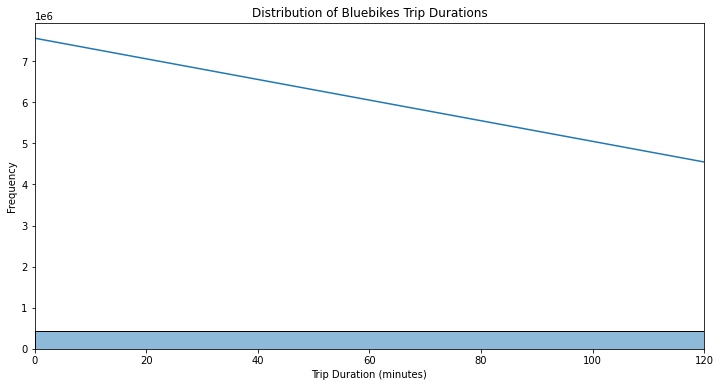

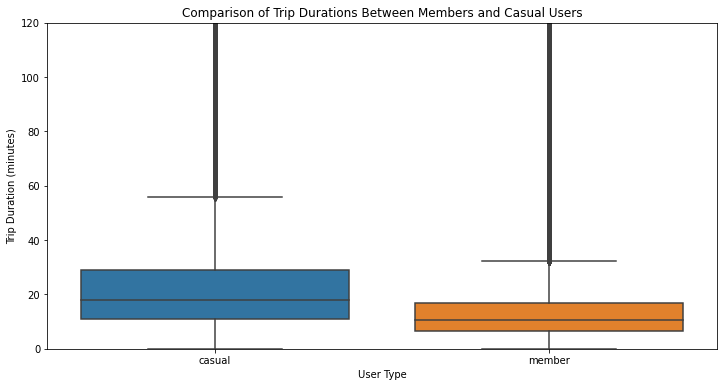

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
bluebikes_data['started_at'] = pd.to_datetime(bluebikes_data['started_at'])
bluebikes_data['ended_at'] = pd.to_datetime(bluebikes_data['ended_at'])
bluebikes_data['trip_duration'] = (bluebikes_data['ended_at'] - bluebikes_data['started_at']).dt.total_seconds() / 60

# Visualizations
# 1. Distribution of trip durations
plt.figure(figsize=(12, 6))
sns.histplot(bluebikes_data['trip_duration'], bins=30, kde=True)
plt.title('Distribution of Bluebikes Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 120)  # Limiting to 120 minutes for better visualization
plt.show()

# 2. Comparison of trip durations between members and casual users
plt.figure(figsize=(12, 6))
sns.boxplot(x='member_casual', y='trip_duration', data=bluebikes_data)
plt.title('Comparison of Trip Durations Between Members and Casual Users')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.ylim(0, 120)  
plt.show()
